# Topic: ผลกระทบจากเศรษฐกิจทำให้อัตราเด็กเกิดใหม่ลดลงหรือไม่

In [1]:
import sys

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

import seaborn as sns
sns.set()

# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('default') 

!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf
mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font', family='TH Sarabun Chula')

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"Matplotlib {mpl.__version__}" )

Python 3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]
Pandas 1.3.5
NumPy 1.21.6
Matplotlib 3.2.2


# Import and Inspect data

In [2]:
birth = pd.read_csv('https://raw.githubusercontent.com/pnithida/birthrate/main/birthrate_TH.csv')  
birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   จังหวัด    2215 non-null   object
 1   ปี         2215 non-null   int64 
 2   ชาย (คน)   2215 non-null   int64 
 3   หญิง (คน)  2215 non-null   int64 
 4   รวม (คน)   2215 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 86.6+ KB


In [3]:
income = pd.read_csv('https://raw.githubusercontent.com/pnithida/birthrate/main/income_TH.csv')  
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ภาค      78 non-null     object 
 1   จังหวัด  78 non-null     object 
 2   2547     77 non-null     float64
 3   2549     77 non-null     float64
 4   2550     77 non-null     float64
 5   2552     77 non-null     float64
 6   2554     77 non-null     float64
 7   2556     78 non-null     float64
 8   2558     78 non-null     float64
 9   2560     78 non-null     float64
 10  2562     78 non-null     float64
 11  2564     78 non-null     float64
dtypes: float64(10), object(2)
memory usage: 7.4+ KB


In [4]:
expense = pd.read_csv('https://raw.githubusercontent.com/pnithida/birthrate/main/expense_TH.csv')
expense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ภาค      78 non-null     object 
 1   จังหวัด  78 non-null     object 
 2   2555     78 non-null     float64
 3   2556     78 non-null     float64
 4   2557     78 non-null     float64
 5   2558     78 non-null     float64
 6   2559     78 non-null     float64
 7   2560     78 non-null     float64
 8   2561     78 non-null     float64
 9   2562     78 non-null     float64
 10  2563     78 non-null     float64
 11  2564     78 non-null     float64
dtypes: float64(10), object(2)
memory usage: 7.4+ KB


In [5]:
gpp = pd.read_csv('https://raw.githubusercontent.com/pnithida/birthrate/main/gpp.csv')
gpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   จังหวัด  77 non-null     object 
 1   2556     77 non-null     float64
 2   2557     77 non-null     float64
 3   2558     77 non-null     float64
 4   2559     77 non-null     float64
 5   2560     77 non-null     float64
 6   2561     77 non-null     float64
 7   2562     77 non-null     float64
 8   2563     77 non-null     float64
dtypes: float64(8), object(1)
memory usage: 5.5+ KB


In [6]:
cpi = pd.read_csv('https://raw.githubusercontent.com/pnithida/birthrate/main/cpi_TH.csv')
cpi = cpi.iloc[4:]
cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 4 to 23
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ปี               20 non-null     int64  
 1   สมุทรปราการ      20 non-null     float64
 2   นนทบุรี          20 non-null     float64
 3   ปทุมธานี         20 non-null     float64
 4   พระนครศรีอยุธยา  20 non-null     float64
 5   อ่างทอง          20 non-null     float64
 6   ลพบุรี           20 non-null     float64
 7   สิงห์บุรี        20 non-null     float64
 8   ชัยนาท           20 non-null     float64
 9   สระบุรี          20 non-null     float64
 10  ชลบุรี           20 non-null     float64
 11  ระยอง            20 non-null     float64
 12  จันทบุรี         20 non-null     float64
 13  ตราด             20 non-null     float64
 14  ฉะเชิงเทรา       20 non-null     float64
 15  ปราจีนบุรี       20 non-null     float64
 16  นครนายก          20 non-null     float64
 17  สระแก้ว          2

# Prepare data (reshape data, join data)

###### เนื่องจาก raw data มีแค่ชื่อจังหวัด ไม่มีภาค จึงต้อง join ข้อมูล

In [7]:
region = income.iloc[ : , [0,1] ]
region

,ภาค,จังหวัด
0,ทั่วราชอาณาจักร,ทั่วราชอาณาจักร
1,กรุงเทพและปริมณฑล,กรุงเทพมหานคร
2,กรุงเทพและปริมณฑล,สมุทรปราการ
3,กรุงเทพและปริมณฑล,นนทบุรี
4,กรุงเทพและปริมณฑล,ปทุมธานี
...,...,...
73,ภาคใต้,ตรัง
74,ภาคใต้,พัทลุง
75,ภาคใต้,ปัตตานี
76,ภาคใต้,ยะลา


In [8]:
birth = pd.merge( birth, region, left_on='จังหวัด', right_on='จังหวัด', how='left' )
birth

,จังหวัด,ปี,ชาย (คน),หญิง (คน),รวม (คน),ภาค
0,กรุงเทพมหานคร,2536,74967,69856,144823,กรุงเทพและปริมณฑล
1,สมุทรปราการ,2536,5713,5382,11095,กรุงเทพและปริมณฑล
2,นนทบุรี,2536,4591,4402,8993,กรุงเทพและปริมณฑล
3,ปทุมธานี,2536,2880,2737,5617,กรุงเทพและปริมณฑล
4,พระนครศรีอยุธยา,2536,4093,4087,8180,ภาคกลาง
...,...,...,...,...,...,...
2210,ตรัง,2564,2595,2482,5077,ภาคใต้
2211,พัทลุง,2564,1697,1707,3404,ภาคใต้
2212,ปัตตานี,2564,5192,5091,10283,ภาคใต้
2213,ยะลา,2564,5073,4682,9755,ภาคใต้


###### รวม file รายได้และรายจ่ายไว้ใน table เดียวกัน

In [9]:
inc = income.iloc[ 1:78 , 1:13]
inc

,จังหวัด,2547,2549,2550,2552,2554,2556,2558,2560,2562,2564
1,กรุงเทพมหานคร,29842.68,36658.0,39020.0,42379.83048,48951.0,49190.8,45571.7,45707.31,39459.36,40200.77
2,สมุทรปราการ,19946.54,20382.0,21302.0,23359.37796,23797.9,29575.3,25457.2,28711.77,24729.42,32913.65
3,นนทบุรี,26657.97,31152.0,32743.0,34626.27613,35119.7,30663.6,36884.0,40860.88,37502.22,41129.42
4,ปทุมธานี,21529.67,25143.0,26107.0,26686.22302,21615.5,33461.3,41056.9,41483.71,46977.74,39506.99
5,พระนครศรีอยุธยา,14979.78,19676.0,21676.0,25819.97911,22301.7,26481.5,28379.4,28777.58,30589.95,31416.10
...,...,...,...,...,...,...,...,...,...,...,...
73,ตรัง,17038.25,20801.0,23650.0,21992.00000,36245.2,33269.9,23309.1,21813.89,26004.22,24457.23
74,พัทลุง,14984.53,18045.0,18670.0,19381.00000,25201.9,26169.3,21478.3,20508.68,20084.91,24084.10
75,ปัตตานี,11837.21,12547.0,11840.0,13511.00000,16121.5,20199.1,17513.0,19495.51,22903.84,20691.69
76,ยะลา,11886.38,14354.0,13698.0,19619.00000,21858.8,22483.1,15583.8,18018.21,16588.15,19181.87


In [10]:
df_income = inc.melt( id_vars='จังหวัด')

dict = {'variable': 'ปี',
        'value': 'รายได้'}

df_income.rename(columns=dict,inplace=True)
df_income

,จังหวัด,ปี,รายได้
0,กรุงเทพมหานคร,2547,29842.68
1,สมุทรปราการ,2547,19946.54
2,นนทบุรี,2547,26657.97
3,ปทุมธานี,2547,21529.67
4,พระนครศรีอยุธยา,2547,14979.78
...,...,...,...
765,ตรัง,2564,24457.23
766,พัทลุง,2564,24084.10
767,ปัตตานี,2564,20691.69
768,ยะลา,2564,19181.87


In [11]:
exp = expense.iloc[ 1:78 , 1:13]
exp

,จังหวัด,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564
1,กรุงเทพมหานคร,33956.98,35023.7,34425.64,33085.7,35101.40,35350.70,34127.44,31753.04,32052.03,31866.68
2,สมุทรปราการ,25860.88,26192.9,22747.21,22331.8,24353.97,24354.72,23231.71,21423.43,23850.82,27484.76
3,นนทบุรี,28731.23,26946.6,30812.06,31381.0,28828.37,33313.04,33808.98,32189.09,33042.31,33995.57
4,ปทุมธานี,30668.81,29514.0,30197.07,29770.0,31271.04,33604.46,43300.51,37086.11,33823.84,31639.92
5,พระนครศรีอยุธยา,25215.89,20493.7,20409.63,22218.1,23095.32,23780.19,22790.08,24439.76,23391.26,25326.92
...,...,...,...,...,...,...,...,...,...,...,...
73,ตรัง,19617.83,20922.3,17107.10,19794.9,18599.29,18768.44,18648.61,20143.01,17904.52,18296.68
74,พัทลุง,18404.19,16635.7,18514.03,17143.3,18420.66,16807.88,15947.09,15848.77,16817.89,17578.04
75,ปัตตานี,14119.15,16668.1,14809.34,15341.1,17962.18,16948.61,15705.85,15948.56,14862.49,15392.67
76,ยะลา,12883.10,12521.7,12370.15,13453.9,14122.15,15483.63,13301.01,13595.63,14141.04,14927.64


In [12]:
df_expense = exp.melt( id_vars='จังหวัด')

dict = {'variable': 'ปี',
        'value': 'รายจ่าย'}

df_expense.rename(columns=dict,inplace=True)
df_expense

,จังหวัด,ปี,รายจ่าย
0,กรุงเทพมหานคร,2555,33956.98
1,สมุทรปราการ,2555,25860.88
2,นนทบุรี,2555,28731.23
3,ปทุมธานี,2555,30668.81
4,พระนครศรีอยุธยา,2555,25215.89
...,...,...,...
765,ตรัง,2564,18296.68
766,พัทลุง,2564,17578.04
767,ปัตตานี,2564,15392.67
768,ยะลา,2564,14927.64


In [13]:
#รวมรายได้และรายจ่ายในตารางเดียวกัน
inc_exp = pd.merge( df_income, df_expense, left_on=['จังหวัด','ปี'], right_on=['จังหวัด','ปี'], how='outer' )
inc_exp

,จังหวัด,ปี,รายได้,รายจ่าย
0,กรุงเทพมหานคร,2547,29842.68,NaN
1,สมุทรปราการ,2547,19946.54,NaN
2,นนทบุรี,2547,26657.97,NaN
3,ปทุมธานี,2547,21529.67,NaN
4,พระนครศรีอยุธยา,2547,14979.78,NaN
...,...,...,...,...
1150,ตรัง,2563,NaN,17904.52
1151,พัทลุง,2563,NaN,16817.89
1152,ปัตตานี,2563,NaN,14862.49
1153,ยะลา,2563,NaN,14141.04


In [14]:
#รวมข้อมูลภาคเข้ามาในตาราง
inc_exp = pd.merge( inc_exp, region, left_on='จังหวัด', right_on='จังหวัด', how='left' )
inc_exp

,จังหวัด,ปี,รายได้,รายจ่าย,ภาค
0,กรุงเทพมหานคร,2547,29842.68,NaN,กรุงเทพและปริมณฑล
1,สมุทรปราการ,2547,19946.54,NaN,กรุงเทพและปริมณฑล
2,นนทบุรี,2547,26657.97,NaN,กรุงเทพและปริมณฑล
3,ปทุมธานี,2547,21529.67,NaN,กรุงเทพและปริมณฑล
4,พระนครศรีอยุธยา,2547,14979.78,NaN,ภาคกลาง
...,...,...,...,...,...
1150,ตรัง,2563,NaN,17904.52,ภาคใต้
1151,พัทลุง,2563,NaN,16817.89,ภาคใต้
1152,ปัตตานี,2563,NaN,14862.49,ภาคใต้
1153,ยะลา,2563,NaN,14141.04,ภาคใต้


# Analyze data: 

### 1. Birth rate in Thailand (all province in 1 line)

In [15]:
group_th = birth.groupby(['ปี'])
sum_th = group_th.agg('sum')
sum_th

,ชาย (คน),หญิง (คน),รวม (คน)
ปี,,,
2536,503551,480413,983964
2537,497817,472943,970760
2538,474986,453970,928956
2539,504739,478656,983395
2540,451868,428160,880028
2541,442434,419826,862260
2542,398560,375789,774349
2543,403151,382867,786018
2544,394245,371862,766107


Text(0.5, 0.98, '== อัตราเด็กเกิดใหม่ในประเทศไทย ==')

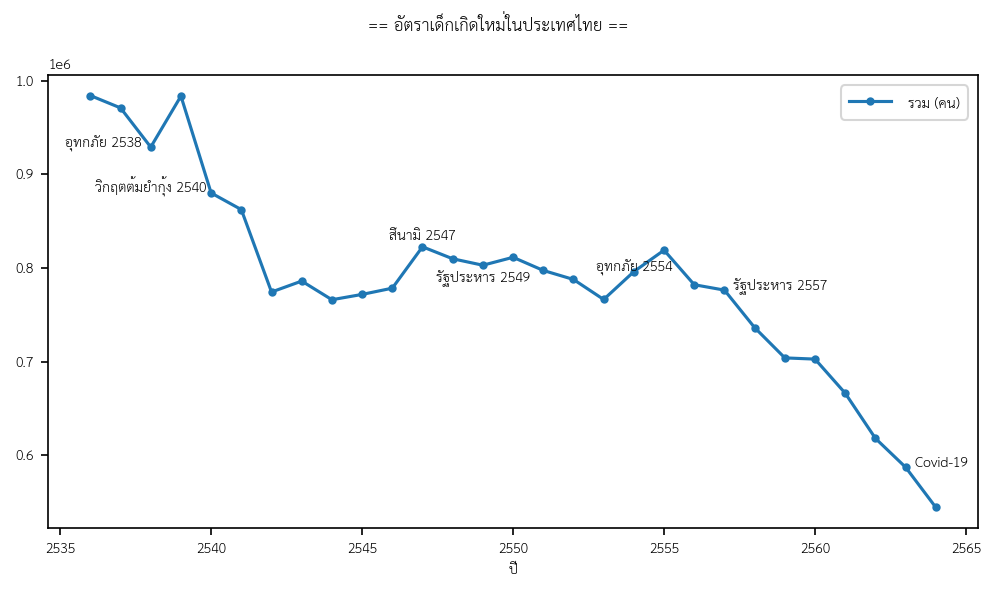

In [16]:
%matplotlib inline

#birth rate (every provinces)
fig, ax = plt.subplots(figsize=(8,4),dpi=150)
sum_th.plot(y='รวม (คน)',ax=ax, marker = '.')

ax.text(2538, 928956, "อุทกภัย 2538  ", ha='right')
ax.text(2540, 880028, "วิกฤตต้มยำกุ้ง 2540 ", ha='right')
ax.text(2547, 830000, "สึนามิ 2547", ha='center')
ax.text(2549, 785000, "รัฐประหาร 2549", ha='center')
ax.text(2554, 796091, "อุทกภัย 2554",ha='center')
ax.text(2557, 776370, "  รัฐประหาร 2557")
ax.text(2563, 587368, "  Covid-19")

fig.suptitle('== อัตราเด็กเกิดใหม่ในประเทศไทย ==')

###2. Birth rate by region

In [17]:
birth_region = birth.pivot_table(index='ปี',columns='ภาค',values='รวม (คน)',aggfunc='sum')
birth_region

ภาค,กรุงเทพและปริมณฑล,ภาคกลาง,ภาคตะวันออกเฉียงเหนือ,ภาคเหนือ,ภาคใต้
ปี,,,,,
2536,170528,170321,332560,162187,148368
2537,175637,173660,318091,155069,148303
2538,165687,167590,303879,148813,142987
2539,184170,183582,312700,153188,149755
2540,173423,168079,276082,129564,132880
2541,119882,168058,293498,136201,144621
2542,124768,149503,248078,123286,128714
2543,137052,149888,248821,116597,133660
2544,131822,146730,241071,117195,129289


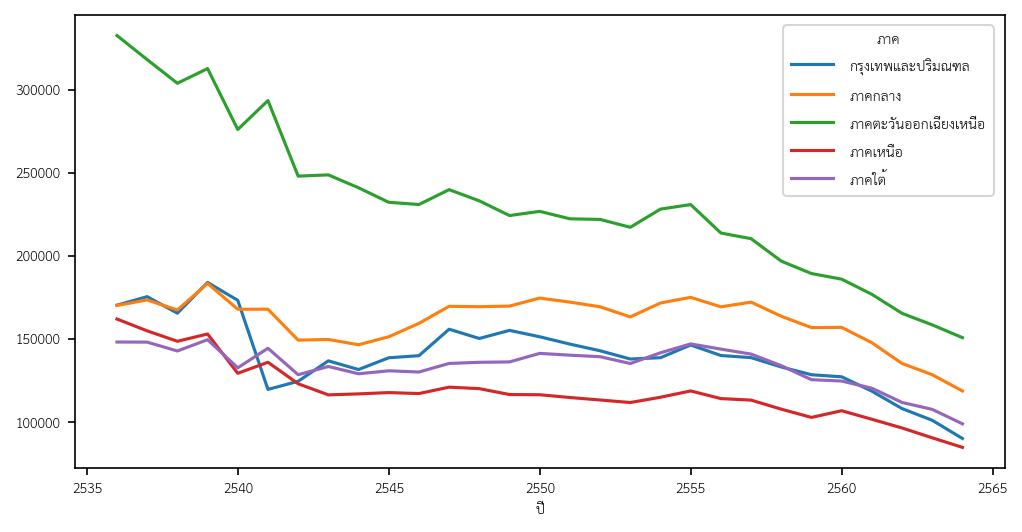

In [18]:
fig, ax = plt.subplots(figsize=(8,4),dpi=150)
birth_region.plot(ax=ax)

###3. Top & Lowest 5 provinces (rank by %change in birth rate)

In [19]:
birth_groupby = birth.groupby(['จังหวัด','ภาค'])[['รวม (คน)']].agg('mean')
birth_groupby = round(birth_groupby)
birth_groupby = birth_groupby.sort_values( 'รวม (คน)', ascending=False )
birth_groupby = birth_groupby.reset_index()
birth_groupby

,จังหวัด,ภาค,รวม (คน)
0,กรุงเทพมหานคร,กรุงเทพและปริมณฑล,106294.0
1,นครราชสีมา,ภาคตะวันออกเฉียงเหนือ,28081.0
2,ชลบุรี,ภาคกลาง,25901.0
3,อุบลราชธานี,ภาคตะวันออกเฉียงเหนือ,21988.0
4,ขอนแก่น,ภาคตะวันออกเฉียงเหนือ,20812.0
...,...,...,...
72,ตราด,ภาคกลาง,2639.0
73,ชัยนาท,ภาคกลาง,2573.0
74,ระนอง,ภาคใต้,2432.0
75,สิงห์บุรี,ภาคกลาง,2372.0


In [20]:
birth1 = pd.merge( birth, birth_groupby, left_on=['จังหวัด','ภาค'], right_on=['จังหวัด','ภาค'], how='outer' )

dict = {'รวม (คน)_x': 'รวม (คน)',
        'รวม (คน)_y': 'mean_รวม (คน)'}

birth1.rename(columns=dict,inplace=True)
birth1

,จังหวัด,ปี,ชาย (คน),หญิง (คน),รวม (คน),ภาค,mean_รวม (คน)
0,กรุงเทพมหานคร,2536,74967,69856,144823,กรุงเทพและปริมณฑล,106294.0
1,กรุงเทพมหานคร,2537,75917,71196,147113,กรุงเทพและปริมณฑล,106294.0
2,กรุงเทพมหานคร,2538,70009,66108,136117,กรุงเทพและปริมณฑล,106294.0
3,กรุงเทพมหานคร,2539,77979,72482,150461,กรุงเทพและปริมณฑล,106294.0
4,กรุงเทพมหานคร,2540,73194,68464,141658,กรุงเทพและปริมณฑล,106294.0
...,...,...,...,...,...,...,...
2210,บึงกาฬ,2560,1873,1848,3721,ภาคตะวันออกเฉียงเหนือ,3984.0
2211,บึงกาฬ,2561,1907,1819,3726,ภาคตะวันออกเฉียงเหนือ,3984.0
2212,บึงกาฬ,2562,1623,1736,3359,ภาคตะวันออกเฉียงเหนือ,3984.0
2213,บึงกาฬ,2563,1693,1555,3248,ภาคตะวันออกเฉียงเหนือ,3984.0


In [21]:
birth2 = birth1[ ['จังหวัด','ภาค','ปี','รวม (คน)','mean_รวม (คน)'] ]

birth2['%การเปลี่ยนแปลง'] = birth2[['รวม (คน)','mean_รวม (คน)']].apply(lambda x: (x['รวม (คน)'] - x['mean_รวม (คน)'])/x['รวม (คน)'], axis=1)      

birth2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,จังหวัด,ภาค,ปี,รวม (คน),mean_รวม (คน),%การเปลี่ยนแปลง
0,กรุงเทพมหานคร,กรุงเทพและปริมณฑล,2536,144823,106294.0,0.266042
1,กรุงเทพมหานคร,กรุงเทพและปริมณฑล,2537,147113,106294.0,0.277467
2,กรุงเทพมหานคร,กรุงเทพและปริมณฑล,2538,136117,106294.0,0.219098
3,กรุงเทพมหานคร,กรุงเทพและปริมณฑล,2539,150461,106294.0,0.293545
4,กรุงเทพมหานคร,กรุงเทพและปริมณฑล,2540,141658,106294.0,0.249644
...,...,...,...,...,...,...
2210,บึงกาฬ,ภาคตะวันออกเฉียงเหนือ,2560,3721,3984.0,-0.070680
2211,บึงกาฬ,ภาคตะวันออกเฉียงเหนือ,2561,3726,3984.0,-0.069243
2212,บึงกาฬ,ภาคตะวันออกเฉียงเหนือ,2562,3359,3984.0,-0.186067
2213,บึงกาฬ,ภาคตะวันออกเฉียงเหนือ,2563,3248,3984.0,-0.226601


In [22]:
birth3 = birth[ (birth['ปี'] == 2554) | (birth['ปี'] == 2564) ][ ['จังหวัด','ภาค','ปี','รวม (คน)'] ]
birth3

,จังหวัด,ภาค,ปี,รวม (คน)
1368,กรุงเทพมหานคร,กรุงเทพและปริมณฑล,2554,100331
1369,สมุทรปราการ,กรุงเทพและปริมณฑล,2554,16485
1370,นนทบุรี,กรุงเทพและปริมณฑล,2554,11425
1371,ปทุมธานี,กรุงเทพและปริมณฑล,2554,10700
1372,พระนครศรีอยุธยา,ภาคกลาง,2554,8651
...,...,...,...,...
2210,ตรัง,ภาคใต้,2564,5077
2211,พัทลุง,ภาคใต้,2564,3404
2212,ปัตตานี,ภาคใต้,2564,10283
2213,ยะลา,ภาคใต้,2564,9755


In [23]:
birth4 = birth3.pivot(index='จังหวัด',columns='ปี',values='รวม (คน)')
birth4 = birth4.reset_index()
birth4

ปี,จังหวัด,2554,2564
0,กระบี่,7508,5018
1,กรุงเทพมหานคร,100331,61604
2,กาญจนบุรี,10105,6895
3,กาฬสินธุ์,9044,5954
4,กำแพงเพชร,6523,4257
...,...,...,...
72,เพชรบุรี,5049,3225
73,เพชรบูรณ์,8861,5963
74,เลย,7090,4858
75,แพร่,3418,2091


In [24]:
#Head
birth5 = birth4[ ['จังหวัด',2554,2564] ]

birth5['%เปลี่ยนแปลง'] = birth4[['จังหวัด',2554,2564]].apply(lambda x: ((x[2564] - x[2554])/x[2564])*100, axis=1)       
birth5 = birth5.sort_values( '%เปลี่ยนแปลง', ascending=True )
birth5 = birth5.head(5)
birth5

ปี,จังหวัด,2554,2564,%เปลี่ยนแปลง
9,ชัยนาท,2926,1394,-109.899570
69,อ่างทอง,2970,1573,-88.811189
32,พังงา,3280,1860,-76.344086
12,ตรัง,8911,5077,-75.517038
62,หนองคาย,6438,3684,-74.755700


In [25]:
#Tail
birth5t = birth4[ ['จังหวัด',2554,2564] ]

birth5t['%เปลี่ยนแปลง'] = birth4[['จังหวัด',2554,2564]].apply(lambda x: ((x[2564] - x[2554])/x[2564])*100, axis=1)       
birth5t = birth5t.sort_values( '%เปลี่ยนแปลง', ascending=True )
birth5t = birth5t.tail(5)
birth5t

ปี,จังหวัด,2554,2564,%เปลี่ยนแปลง
71,เชียงใหม่,18739,15719,-19.212418
39,ยะลา,11122,9755,-14.013326
26,ปทุมธานี,10700,9598,-11.481559
76,แม่ฮ่องสอน,3458,3288,-5.170316
14,ตาก,8709,9174,5.068672


In [26]:
#Melt head
birth6 = birth5.melt( id_vars=['จังหวัด'],           # Column(s) to use as identifier variables (these columns will not be melted)
                              value_vars=[2554,2564] )   # Column(s) to unpivot

dict = {'variable': 'จังหวัด',
        'value': 'รวม (คน)'}

birth6.rename(columns=dict,inplace=True)
birth6

,จังหวัด,ปี,รวม (คน)
0,ชัยนาท,2554,2926
1,อ่างทอง,2554,2970
2,พังงา,2554,3280
3,ตรัง,2554,8911
4,หนองคาย,2554,6438
5,ชัยนาท,2564,1394
6,อ่างทอง,2564,1573
7,พังงา,2564,1860
8,ตรัง,2564,5077
9,หนองคาย,2564,3684


In [27]:
#Melt tail
birth6t = birth5t.melt( id_vars=['จังหวัด'],           # Column(s) to use as identifier variables (these columns will not be melted)
                              value_vars=[2554,2564] )   # Column(s) to unpivot

dict = {'variable': 'จังหวัด',
        'value': 'รวม (คน)'}

birth6t.rename(columns=dict,inplace=True)
birth6t

,จังหวัด,ปี,รวม (คน)
0,เชียงใหม่,2554,18739
1,ยะลา,2554,11122
2,ปทุมธานี,2554,10700
3,แม่ฮ่องสอน,2554,3458
4,ตาก,2554,8709
5,เชียงใหม่,2564,15719
6,ยะลา,2564,9755
7,ปทุมธานี,2564,9598
8,แม่ฮ่องสอน,2564,3288
9,ตาก,2564,9174


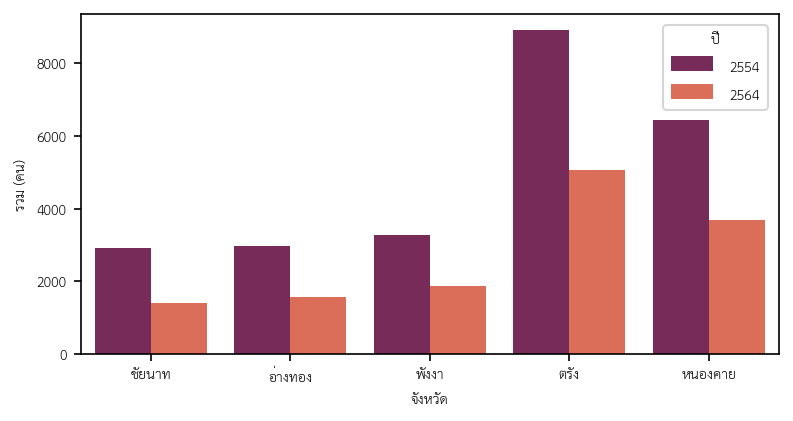

In [28]:
#Plot bar for head
plt.figure(figsize=(6, 3), dpi = 150) 
sns.barplot(data=birth6,x='จังหวัด',y='รวม (คน)',hue='ปี',palette='rocket')

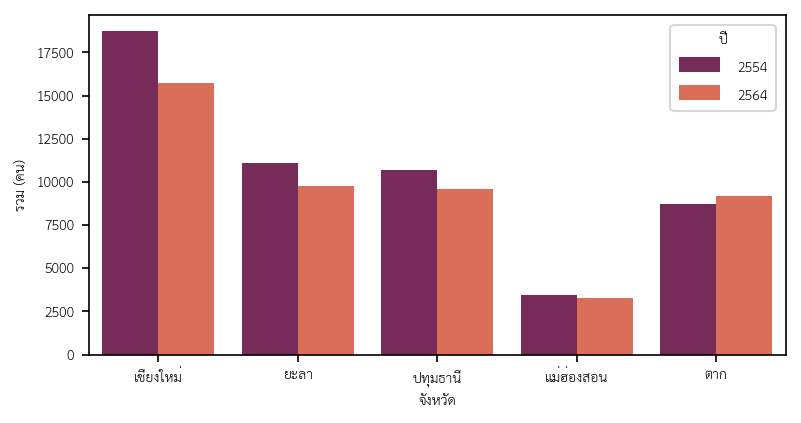

In [29]:
#Plot bar for head
plt.figure(figsize=(6, 3), dpi = 150) 
sns.barplot(data=birth6t,x='จังหวัด',y='รวม (คน)',hue='ปี',palette='rocket')

###4. Heat map (CPI)

In [30]:
df_cpi = cpi.melt( id_vars='ปี')

dict = {'variable': 'จังหวัด',
        'value': 'CPI'}

df_cpi.rename(columns=dict,inplace=True)
df_cpi

,ปี,จังหวัด,CPI
0,2545,สมุทรปราการ,63.90
1,2546,สมุทรปราการ,64.40
2,2547,สมุทรปราการ,65.30
3,2548,สมุทรปราการ,69.10
4,2549,สมุทรปราการ,72.20
...,...,...,...
1535,2560,กรุงเทพมหานคร,97.99
1536,2561,กรุงเทพมหานคร,99.12
1537,2562,กรุงเทพมหานคร,100.00
1538,2563,กรุงเทพมหานคร,99.27


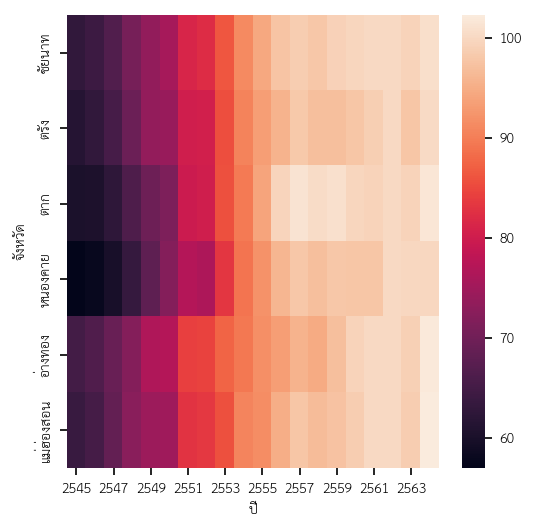

In [31]:
chm = df_cpi[ (df_cpi['จังหวัด'] == 'ชัยนาท') | (df_cpi['จังหวัด'] == 'อ่างทอง')| (df_cpi['จังหวัด'] == 'ตรัง')| (df_cpi['จังหวัด'] == 'หนองคาย') | (df_cpi['จังหวัด'] == 'แม่ฮ่องสอน') | (df_cpi['จังหวัด'] == 'ตาก')][ ['จังหวัด','ปี', 'CPI'] ] 

chm =chm.pivot(index='จังหวัด',columns='ปี',values='CPI')
fig, ax = plt.subplots(figsize=(4,4),dpi=150)
ax = sns.heatmap(chm)

###5. Heat map (GPP)

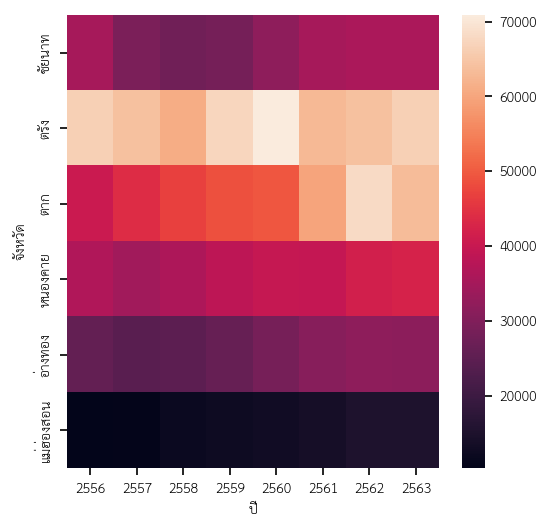

In [32]:
gpp1 = gpp[ (gpp['จังหวัด'] == 'ชัยนาท') | (gpp['จังหวัด'] == 'อ่างทอง')| (gpp['จังหวัด'] == 'ตรัง')| (gpp['จังหวัด'] == 'หนองคาย')  | (gpp['จังหวัด'] == 'แม่ฮ่องสอน') | (gpp['จังหวัด'] == 'ตาก')]

gpp2 = gpp1.melt( id_vars='จังหวัด')

dict = {'variable': 'ปี',
        'value': 'GPP'}

gpp2.rename(columns=dict,inplace=True)

ghm =gpp2.pivot(index='จังหวัด',columns='ปี',values='GPP')
fig, ax = plt.subplots(figsize=(4,4),dpi=150)
ax = sns.heatmap(ghm)

###6. Bar plot (income-expense) by region

In [33]:
living_inc = inc_exp.pivot_table(index='ปี',columns='ภาค',values='รายได้',aggfunc='mean')
living_exp = inc_exp.pivot_table(index='ปี',columns='ภาค',values='รายจ่าย',aggfunc='mean')

In [34]:
living_inc = living_inc.reset_index()

living_inc_1 = living_inc.melt( id_vars=['ปี'],           
                              value_vars=['กรุงเทพและปริมณฑล','ภาคกลาง','ภาคตะวันออกเฉียงเหนือ','ภาคเหนือ','ภาคใต้'] )

dict = {'variable': 'ปี',
        'value': 'รายได้'}

living_inc_1.rename(columns=dict,inplace=True)
living_inc_1

,ปี,ภาค,รายได้
0,2547,กรุงเทพและปริมณฑล,24494.215000
1,2549,กรุงเทพและปริมณฑล,28333.750000
2,2550,กรุงเทพและปริมณฑล,29793.000000
3,2552,กรุงเทพและปริมณฑล,31762.926898
4,2554,กรุงเทพและปริมณฑล,32371.025000
5,2556,กรุงเทพและปริมณฑล,35722.750000
6,2558,กรุงเทพและปริมณฑล,37242.450000
7,2560,กรุงเทพและปริมณฑล,39190.917500
8,2562,กรุงเทพและปริมณฑล,37167.185000
9,2564,กรุงเทพและปริมณฑล,38437.707500


In [35]:
living_exp = living_exp.reset_index()
living_exp_1 = living_exp.melt( id_vars=['ปี'],           # Column(s) to use as identifier variables (these columns will not be melted)
                              value_vars=['กรุงเทพและปริมณฑล','ภาคกลาง','ภาคตะวันออกเฉียงเหนือ','ภาคเหนือ','ภาคใต้'] )   # Column(s) to unpivot

dict = {'variable': 'ปี',
        'value': 'รายจ่าย'}

living_exp_1.rename(columns=dict,inplace=True)
living_exp_1

,ปี,ภาค,รายจ่าย
0,2555,กรุงเทพและปริมณฑล,29804.475000
1,2556,กรุงเทพและปริมณฑล,29419.300000
2,2557,กรุงเทพและปริมณฑล,29545.495000
3,2558,กรุงเทพและปริมณฑล,29142.125000
4,2559,กรุงเทพและปริมณฑล,29888.695000
5,2560,กรุงเทพและปริมณฑล,31655.730000
6,2561,กรุงเทพและปริมณฑล,33617.160000
7,2562,กรุงเทพและปริมณฑล,30612.917500
8,2563,กรุงเทพและปริมณฑล,30692.250000
9,2564,กรุงเทพและปริมณฑล,31246.732500


In [36]:
liv_inc_exp = pd.merge( living_inc_1, living_exp_1, left_on=['ปี','ภาค'], right_on=['ปี','ภาค'], how='outer', sort=True)

liv_bkk = liv_inc_exp[ liv_inc_exp['ภาค'] == 'กรุงเทพและปริมณฑล'][['ภาค','ปี','รายได้','รายจ่าย']]
liv_north = liv_inc_exp[ liv_inc_exp['ภาค'] == 'ภาคเหนือ'][['ภาค','ปี','รายได้','รายจ่าย']]
liv_south = liv_inc_exp[ liv_inc_exp['ภาค'] == 'ภาคใต้'][['ภาค','ปี','รายได้','รายจ่าย']]
liv_central = liv_inc_exp[ liv_inc_exp['ภาค'] == 'ภาคกลาง'][['ภาค','ปี','รายได้','รายจ่าย']]
liv_northeast = liv_inc_exp[ liv_inc_exp['ภาค'] == 'ภาคตะวันออกเฉียงเหนือ'][['ภาค','ปี','รายได้','รายจ่าย']]

liv_bkk_1 = liv_bkk.melt( id_vars=['ภาค','ปี'],
                              value_vars=['รายได้','รายจ่าย'] )
liv_north_1 = liv_north.melt( id_vars=['ภาค','ปี'],
                              value_vars=['รายได้','รายจ่าย'] )
liv_south_1 = liv_south.melt( id_vars=['ภาค','ปี'],
                              value_vars=['รายได้','รายจ่าย'] )
liv_central_1 = liv_central.melt( id_vars=['ภาค','ปี'],
                              value_vars=['รายได้','รายจ่าย'] )
liv_northeast_1 = liv_northeast.melt( id_vars=['ภาค','ปี'],
                              value_vars=['รายได้','รายจ่าย'] )

dict = {'variable': 'ประเภท',
        'value': 'มูลค่า (บาท)'}

liv_bkk_1.rename(columns=dict,inplace=True)
liv_north_1.rename(columns=dict,inplace=True)
liv_south_1.rename(columns=dict,inplace=True)
liv_central_1.rename(columns=dict,inplace=True)
liv_northeast_1.rename(columns=dict,inplace=True)

In [37]:
df_liv = pd.concat( [liv_bkk_1, liv_north_1,liv_south_1,liv_central_1,liv_northeast_1], ignore_index=True  )    # default:axis=0
df_liv

,ภาค,ปี,ประเภท,มูลค่า (บาท)
0,กรุงเทพและปริมณฑล,2547,รายได้,24494.215000
1,กรุงเทพและปริมณฑล,2549,รายได้,28333.750000
2,กรุงเทพและปริมณฑล,2550,รายได้,29793.000000
3,กรุงเทพและปริมณฑล,2552,รายได้,31762.926898
4,กรุงเทพและปริมณฑล,2554,รายได้,32371.025000
...,...,...,...,...
145,ภาคตะวันออกเฉียงเหนือ,2560,รายจ่าย,16604.834500
146,ภาคตะวันออกเฉียงเหนือ,2561,รายจ่าย,16187.827000
147,ภาคตะวันออกเฉียงเหนือ,2562,รายจ่าย,16686.701500
148,ภาคตะวันออกเฉียงเหนือ,2563,รายจ่าย,17029.284500


In [38]:
live_groupby = df_liv.groupby(['ภาค','ประเภท'], as_index = False)[['มูลค่า (บาท)']].agg('mean')
live_groupby = round(live_groupby,2)
live_groupby

,ภาค,ประเภท,มูลค่า (บาท)
0,กรุงเทพและปริมณฑล,รายจ่าย,30562.49
1,กรุงเทพและปริมณฑล,รายได้,33451.59
2,ภาคกลาง,รายจ่าย,20282.17
3,ภาคกลาง,รายได้,22526.90
4,ภาคตะวันออกเฉียงเหนือ,รายจ่าย,16250.27
5,ภาคตะวันออกเฉียงเหนือ,รายได้,16799.75
6,ภาคเหนือ,รายจ่าย,15273.57
7,ภาคเหนือ,รายได้,16775.54
8,ภาคใต้,รายจ่าย,20211.69
9,ภาคใต้,รายได้,22966.43


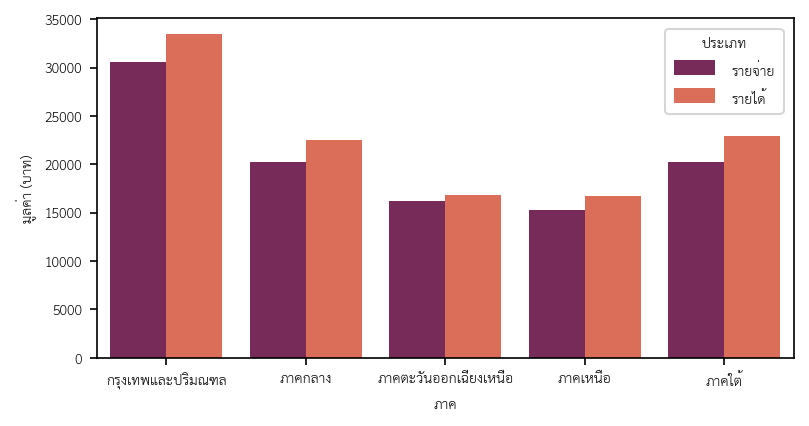

In [39]:
plt.figure(figsize=(6, 3), dpi = 150) 
sns.barplot(data=live_groupby,x='ภาค',y='มูลค่า (บาท)',hue='ประเภท',palette='rocket')

###7. compare CPI with % Birth rate

In [40]:
df_cpi = cpi.melt( id_vars='ปี')

dict = {'variable': 'จังหวัด',
        'value': 'CPI'}

df_cpi.rename(columns=dict,inplace=True)
df_cpi

,ปี,จังหวัด,CPI
0,2545,สมุทรปราการ,63.90
1,2546,สมุทรปราการ,64.40
2,2547,สมุทรปราการ,65.30
3,2548,สมุทรปราการ,69.10
4,2549,สมุทรปราการ,72.20
...,...,...,...
1535,2560,กรุงเทพมหานคร,97.99
1536,2561,กรุงเทพมหานคร,99.12
1537,2562,กรุงเทพมหานคร,100.00
1538,2563,กรุงเทพมหานคร,99.27


In [41]:
cpi_groupby = df_cpi.groupby(['จังหวัด'])[['CPI']].agg('mean')
cpi_groupby = round(cpi_groupby,2)
cpi_groupby = cpi_groupby.sort_values('CPI', ascending=False )

cpi_province = pd.merge( cpi_groupby, region, left_on='จังหวัด', right_on='จังหวัด', how='left' )
cpi_province

,จังหวัด,CPI,ภาค
0,บึงกาฬ,96.55,ภาคตะวันออกเฉียงเหนือ
1,กรุงเทพมหานคร,89.76,กรุงเทพและปริมณฑล
2,ฉะเชิงเทรา,89.38,ภาคกลาง
3,นครนายก,89.37,ภาคกลาง
4,กำแพงเพชร,88.98,ภาคเหนือ
...,...,...,...
72,ยโสธร,82.92,ภาคตะวันออกเฉียงเหนือ
73,ขอนแก่น,82.86,ภาคตะวันออกเฉียงเหนือ
74,พะเยา,82.82,ภาคเหนือ
75,ชัยภูมิ,82.14,ภาคตะวันออกเฉียงเหนือ


In [42]:
birthc = birth4[ ['จังหวัด',2554,2564] ]

birthc['%เปลี่ยนแปลง'] = birth4[['จังหวัด',2554,2564]].apply(lambda x: ((x[2564] - x[2554])/x[2564])*100, axis=1)       
birthc = birthc.sort_values( '%เปลี่ยนแปลง', ascending=True )
birthc

ปี,จังหวัด,2554,2564,%เปลี่ยนแปลง
9,ชัยนาท,2926,1394,-109.899570
69,อ่างทอง,2970,1573,-88.811189
32,พังงา,3280,1860,-76.344086
12,ตรัง,8911,5077,-75.517038
62,หนองคาย,6438,3684,-74.755700
...,...,...,...,...
71,เชียงใหม่,18739,15719,-19.212418
39,ยะลา,11122,9755,-14.013326
26,ปทุมธานี,10700,9598,-11.481559
76,แม่ฮ่องสอน,3458,3288,-5.170316


In [43]:
cpi_birth = pd.merge( cpi_province, birthc, left_on=['จังหวัด'], right_on=['จังหวัด'], how='left' )
cpi_birth = cpi_birth[['จังหวัด','ภาค','CPI','%เปลี่ยนแปลง']]

In [44]:
cpi_birth.head(5)

,จังหวัด,ภาค,CPI,%เปลี่ยนแปลง
0,บึงกาฬ,ภาคตะวันออกเฉียงเหนือ,96.55,-29.162625
1,กรุงเทพมหานคร,กรุงเทพและปริมณฑล,89.76,-62.864424
2,ฉะเชิงเทรา,ภาคกลาง,89.38,-36.627078
3,นครนายก,ภาคกลาง,89.37,-39.634801
4,กำแพงเพชร,ภาคเหนือ,88.98,-53.229974


In [45]:
cpi_birth.tail(5)

,จังหวัด,ภาค,CPI,%เปลี่ยนแปลง
72,ยโสธร,ภาคตะวันออกเฉียงเหนือ,82.92,-45.877193
73,ขอนแก่น,ภาคตะวันออกเฉียงเหนือ,82.86,-52.697910
74,พะเยา,ภาคเหนือ,82.82,-44.223556
75,ชัยภูมิ,ภาคตะวันออกเฉียงเหนือ,82.14,-54.219874
76,หนองบัวลำภู,ภาคตะวันออกเฉียงเหนือ,79.92,-55.061212
